In [1]:
import networkx as nx
import numpy as np

In [2]:
input='XXXXXUUUNNNNNNNNNNNNNNNNQQQQQQQQQJJJJJJJJJJJJJJJJCCCAAAAAAAAAAAAOVVVVVVVVVVVVVVVVVVLLLLLLLLKKKKGGGGGGGGGGGGGGGGGGGKKKKKKKKKKKKKKKKKKKKKKKKKK\nXXXUXXUUUUNNNNNNNNNDNNDGQQQQQQQQQJJJJJJJJJJJJJJJJJJCCCAAAAAAAAAYVVZVVVVVVVVVVVVVVVVVLLLLLLLLKKKGGGGGGGGGGGGGGGGGGGKKKKKKKKKKKKJKKKKKKKKKKKKK\nXUUUUUUUUUENNNNNNNNNNNDCCCCCCCCQQJJEJJJJJJJJJJJJJJCCAAAAAAAAAAAZZZZVVZVVVVVVVVVVVVVVLLLLLLLLKGGGGGGGGGGGGGGGGGGGGKKKKKKKKKKKKAKKKKKKKKKKKKKK\nUUUUUUUUUUUYNNNNNNNNNNNCCCCCCCCQJJJJJJJJJJJJJJJJJJCAAAAAAAAAAAAZZZVVVVVVVVVVVVVVVVVVLLLLLLLLLLZGGGGGGGGGGLLGGGGGGKKKKKKKKKKAAAAKKKKKKKKKKKKG\nUUUUUUUUUKKNNNNNNNNNNZZCCCCCCCCJJJJJJJJJJJDDJJJJJJCAAAAAAAAAAAAHZZVVVVVVVVVVVVVFVVMVVLLLLLLLLLMAAAGGGGLLGLLGGGGGGGGGKKKKKKKAAAAKKKKKKKKKKKKG\nUUUUUUUUUKUANNNNNNNNNZZCCCCCCCCQJJJJJJJJJDDDDJJJJJCJJAAAAAAAAAAHZZVVVVVVVVVVVVVVVVMMLLLLLLLGLLMAAAAGGGLLGLLLLLLLGGGGKKKKKKKAAAAKKKKKKKKKKKKG\nUUUUUUUUUUUUUNNNNNNNNZZCCCCCCCCQQQQJJDDDDDDDDDJJJJJJAAAAAAAAAAAZZZVVVVVVVVVVVVVVVVMMLLLLLLGGGMMAALGGGLLLLLLLLLLLGGGKRKKKKKKAPPPPPKKKKKKKKKKG\nUUUUUUUUUUUUNNNNNNNNNZZCCCCCCCCCCCCCCCCCDDDDDDJJJJJJAAAAAAAAZZZZZZZVVVVVVVVVVVVVVVMMMLLLLLGGGMAAALLLLLLLLLLLLLLLKKKKKKKKKKKPPPPPKKKKKKKKKGGG\nUUUUUUUUUUUZNYNNSNNNNZZCCCCCCCCCCCCCCCCCDDDDDDEJJJJJAAAAAAAAAZZZZZZVVVVVVVVVVVVVVVMMMLLLLLGMMMMMALJLLLLLLLLLLLLLKKKKKKKOKPKPPPPKKKKKKGGKGGGG\nUUUUUUUUUUUZNSNZZZZZZZZCCCCCCCCCCCCCCCCCDDDDDDJJJJJAAAAAAAQAAAZZZZZZZMFMMMMMMMMMMMMMMMLLLGGMMMMMMMLLLLLLLLLLLLLLKKKKKKKKPPPPPPPPKKPKKGGKGGGG\nUUUUUUUUUUMSSSZZZZZZZZZCCCCCCCCCCCCCCCCCDDDDDJJJJJJAAAAAAAQZZZZZZZZZZFFMFMMMMMMMMFFMMLLLLGAMMMMMMMMMLLLLLLLLLLLLLKKKKKKPPPPPPPPPKKPKKGGGGGGG\nUUUUUUUUUMMSSSZZZZZZZZZCCCCCCCCCCCCCCCCCDDDJJJJJJJJJAAJAAQQZZZZZZZZZZFFFFMMMMMMMMFIAMMAAAAAMMMMMMMMLLLLLLLLLLLLLLKFKKKKEPPPPPPPPPKPKGGGGGGGG\nOOUUUUUUSSSSSSZZZZZZZZZCCCCCCCCCCCCCCCCCDDDJJJJJJJJJJJJAAQQNNNZZZZZZZFFFFFFFFFFFFFFAAAAAAAAMMMMMMMMXLLLLLLLLLLLLKKUUUUUPPPPPPPPPPPPPPPGGGGCC\nOUUUUOUUUPSSSSZZZZZZZZZZZZZZZQQCCCCCCCCDDSDDCJJJJJJJJAAAAAQNZZZZZZZZZFFFFFFFHFFFFFFFAAAAAAAAMMMMMMCCCLCLLLLLLLLLLTUUUUUPPPPPPPPPPPPPPPPGGGCC\nOOUGGGGUUSSSSZZZZZZZZZZXXXXJJJJJJCCCCCCDDSSCCJJJJJJJJAAAAANNNNZZZZZBPPFFFFFFFFFFFFFFAAAMAAAAAMMMMMMCCCCCLLLLLLLLLMMUUUPPPPPPPPPPPPPPPPPGGGCC\nOGGGGGGLLLLSSZZZZZZZZZZXXXJJJJJJJCCCCCCSSSSSJJJJJJJJJJJAAANNNNNZZZNPPPPFFGPPFFFFFFFAAAAMAAMMAMMMMMMCCCCCCOOOLLLLLLMMUUUPPPPPPPPPPZPPPPCCCCCC\nOGZZGGGLLLLLSZZZSSSXXXXXXXXXJJJJJCCCCCCSSSSWJJJJJJJJJJPJANNNNNZZZNNPPPPPFPPPPPFFFVHHAAMMMMMMMMMCMCICCCCCCCCOOLTOOLMMMUUPPPPPPPZPPZPCCICCCCCP\nOGGGGGGGGLLSSZZZSSSXXXXXXXXXJJJJJCCCCCCSSSSSJJJJJJJJJJJJNNNNNZZZZZNNPPPPPPPPPPPVVVVVMMMMMMMMMMCCCCCCCCCCCOOOOOOOOOMMUUUUPPPPPZZZZZZCCCCCCCCP\nSGGGGGGGGLSSSZZZSXXXXXXXXXXJJJJJJCCCCCCJSSSRJJJJJJJNJJJNNNNNNNZZZNNPPPPPPPPPPPPVVVVVMVMMMMMMMCCWCCCCCCCCCCCOOOOOOOOOUUUUPPPPPNNZZZCCCCCCCCCP\nSGGGGGGGSSSSSZZZSUXXXXXXXJJJJIJJJCCCCCCJWWWWJJJJJJJJLJJNNNNNNNNNNNNNPPPPPPPPPPPVVVVVVVMMMMMCCCCCCCCCCCCCCCCCCOOOOOOOUUUPPPPPPNNNNCCCCCCCCCPP\nSSSGGGGGGGVSSSSSUUXXXXXXXJJJIIJJJCCCCCCWWWWWJJJJJJJJJJNNFNNNNNNNNPPPPPPPPPPPPPVVVVVVVMMMMMMMRRRRCCCCCCCCCCCCCOOOOUOOUUUPUTNNNNNNNCCCCCCCPCPP\nSSSSZGGGGGRYSSSRXXXXXXXXXXJJJJJJJJJJJJWWWWWWWJJAJJJJJNNFFNNNNNNNNPPPPPPPPPPPPPVVVVVVVMMMMMMMMRRRCCCCCCCCCCCCCOOOOUUUUUUUUTNNNNNNNNCCCCCCPPPP\nSSSZZGHGGGRRJSRRGXXXXXXXXXXJJSSJJJJJJJWWWWWWWJJAJJJJJJFFNNNNNNNNNNPPPPPPPPPPPPPVVVVVVMMMMMMMRRRRRCCCCCCCCCCCCOOOUUUUUUUUUTTTTTNNNNNCCCCPPPPP\nSSQQZZGGGGRRRRRRRXXXXXXXXRXRRJJJJJJJJWWWWWWWWWJJJJJJJJJFFFFFFNNANNNPPPPPPPPPVVVVVVVVVMMMMMRRRRRRRCLLCLLLLLCCCCOOOUUUUUUUTTTTTTNNPPNCCPPPPPPP\nQQQQQZZGGGRRRRRRRXXXXXRRRRRRRRJJJJJJWWWWWWWWWWWWWJJJJFFFFFFFFAAAAAPPPPPPPPPVVVVVVVVVVVVDMMMRRRRRRRLLLLLLLLCLCLOOUUUUUUUUUUUUUUUPPPPPPPPPPPPP\nQQQQZZQQZRRRRRRRRRRRRRRRRRRRRRRJJJJJSWWWWWWWWWWWWWJJJFFFFFFFFAAAAAPPPPPPPPVVVVVVVVVVVVDDMDRRRRRRRRXXXXLLLLLLLLUOUUUUUUUUUUUUUUUPXPPPPPPPPPPP\nQQQQQQQQQRRRRRRRRRRRRRRRRRRRRRRRJVJSSWWWWWWWWWWWWWFFFFFFFSFAAAAAAAPAPPPPPPVVVVVVVVVVDVDDDDRRRRRRRRLXLLLLLLLLLLUUUUUUUUUUUUUUUUUUXXPPPPPPPPPP\nQQQQQQQQQRRRRRRPRRRRRRRRRRRRRRRRVVWWWZWWWWWWWWWWWWJFFFFFFFAAAAAAAAAAVPPPPPVVVVVVVVVVDDDDDDHRRRRRRELLLLLLLLLLLSSUUUUUUKUUUUUUUUKUXPPPPPPPPPPP\nQQQQQDQDGRSPRPPPPRRRRRRRRRRRRRRRRVVVWWWWWWWWFFJJJJJJJJJFFAAAAAAAAAAAAAPPVVVVVVVVVVVDDDDDDRRRRRRRRRRRLLLLLLLLLLSUUUUUKKKUUKKKUUKUUPPPPPPPPPPP\nQDDQDDQDGGPPPPPPPRRRRRRRRRRRRRRRRVVWWWWWWWWWDFFJJFFFFJJFFAAAAAAAAAAAAAAPVVVDDVVVVVDDDDDDDRRRRRRRRRRRLLLLLLLLLSSSUUSUUKKKKKKKKKKUYYPPPPPPPPPP\nQDDDDDDDGPPPPPPPPRRRRRRRRRRRRRRRRVVVVWWWWWQQFFFJFFFFFFFFFAAAAAAAAAAAAABBHDDDDVVDVDDDDDDDDRFRRRRRRRRLLLLLLLLLLLSSSSSSKKKKKKKXXDYYYYYPPPPPPPPP\nDDDDDDDGGGPWPPPPPPPPRRRRRRRRRRRRRRVVVWWQQWQQQFFJFFFFFFFFAAAAAAAAAAAAAUBBHBBBDDDDDDDDDDDDDDRRRRRRRRRLLLLLLLLLLSSSSSSSKKKKKKKKXDYYYYYPYPPPPPPP\nDDDDDDDDDGPWPPPPPPPPPRRRRRRRRRRRRRVRWWWWQQQQQFFFFFFFFFZFAAAAAAAAAAAAABBBBBBBBBBDDDDDDDDDDDDDYRRRRRRRLLLLLLLJLLSSSSSSKKKKKKKKXDDDYYYYYYYPPPKP\nDDDDDDDDDDDDPPPPPPPPPRRRRRRRRRRRRRRRRSSQQQFFFFFFFFKKFFFHHHAAAAAAAAAAABBBBBBBBBBBDDDDDDDDDDDDRRRRRRLLLLLLLLSSSSSSSSSUKKKKKKKKDDDDYYYYYYYPPPPY\nDDDDDDDDDDAAPPPPPPPPPRRRRRRRRRRRRRRRSSQQQEEGFFFFHHFFFFHHHHAAAAAAAAABBBBBBBBBBBBBDDDDDDDDDDDDRRRRRRRLLLHHLLLSSSSSSSSSKKKKKKGGDDDDDDYYYYYPPPYY\nDDDDDDDDDDAAAPPPPPPPPPRRRNNRRRRRRRRSSQQQQEEEFFFHHHHHFHHHHHHHAAAABBBBBBBBBBBBBBBBBDDDDDDDDDRRRRRRRRRLLLHHHLSSSSSSSSSSKKKKKKDDDDDDDDYYYYYYYYYY\nDDDDDDDDDDDAAPPPPPPPPRRRNNNRRRRRRRQQSQQQQEEEFFFHHHHHHHHHHAAAABBBBBBSSBBBBBBBBBBBBDDDDDJJJJDDRRRRRRRHLLHLLLLSSSSSSSSKKKKKKKUDDCDDDDYYYYYYYYYY\nDDDDDDDDDDAAAPPPPPIIIRRRRNRRRRRRRRQQQQQQQEEEFFFHHHHHHHHHHHHAABBBBBBBBYBTBBBBBKBRBDDDDJJMMJJDRRSSRRRHLHHHHHLQQQSSSSSSKKKKKKDDDDDDDYYYYYYYYYYY\nDDDDDDDDDDDAAPPPPPPQIIIRRRRRRRRRRQQQQQQNNQEHHFFFHHHHHHHHHHHHHBBBBBBBYYYBBBBBBBBRRRRDDJJJJJJRRRRRRRHHHHHHJJLQQQSQQSSSSSSKKKDDDDDDDYYYYYYYYYYY\nDDDDDDDDNNDQAPPPPPQQQIIRQRRRRRRRRRQQQQQQNNSHHFHHHHHHHHHHHHHHHBDBBBYYYYYBBBBBBRRRRTDDJJJJJJJTRRRRRRHHHHHHHQQQQQQQQSSSSSSSDDDDDDDDDYYYYYYYYYYY\nDDDDDDDDNNNQAPPNPPPQQIIQQHRRRRRRRRQQQQQQQNSHHHHHHHHHHHHHHHHEHBDDGBBGWWWBBBBBBBRRRTTTTJJJTTTTRHHHHHHHHHHHHHQQQQQQQSSSSSSSSSDDDDDDYYYYYMYYMYYY\nDDDDDDDNNNNQQQPPQQQQQQQQQHHHHHXXXXXQQQQQQNNNHHXXHHHHHHHRRHRRRRDDGBBGWWWWBBBWWBRRRTTTTTTTTTTTTHHHHHHHHHHHHQQQQQQQQSJJSSSSSSSDDDDDYYMYMMMMMMYM\nDDDIIDDDDNNQQQQPQQQQQQQQQQHHHXXXXXQQQQQQQNNEEEHHHHHHHHHRRRRRRRGGGGGGWEWWWBBWWBWWWWRTTTTTTTTTHHHHHHHHFHHLQQQQQQQQQQJJJSSSSDSDIIDDYYMMMMMMMMYM\nDDDDDDDHNNNNQQQQQQQQQQQQHHHHXFXXXXXXXNNNNNNNNHHHHHHHHHHRRRRRRUUGGGGGGGGWWWWWWWWWWWRRTTTTTTTHHHHHHHHFFHGQQQQQQQQQJJJJJJSSSDDDIIYYYYMMMMMMMMMM\nQDDDDNNNNNNNNQQQQQQQZZQQQHHXXXXXXXXXXNUNNNNNNNNPNYYHHHRRRRRRRRUGGGGGGGGWWWWWWWWWWWWWTTTTCTTTHHHHHHHHHGGGQQQQQQQJJJJJVJWSWKKKYIYYYYYMMMMMMMMM\nQDDQNNNNNNNNNNNQQQQQZZLQHHXXXXXXXXXNNNNNNNNNNNNNNNYHHHRRRRRRRRRGGGGGGGWWWWWWWCWWWWCWTTTTCCTCHHHHHHGGHGGQQQQQQQJJJJJJVWWSWKKKYYYYYYYYMMMMMMMM\nQQQQNNNNNNNNNQQQQQQQZZZZZXXXXXXXXXTNNNNNNNNNNNNNNNNNHHRRRRRRRGGGGGGGGGGWWWWCCCWWWCCQQCCCCCCCHVHHHHHGGGGQQQQQQQJJJJJJJWWWWWKKKQYYYYMMMMMMMMMM\nQQQNNNNNNNNNNNQQQQQQQZZZZLXUWXXXXXNNNNNNNNNNNNNNNNNKKHRRRRRRRGGGGGGGGGGWWWCCCCCCCCCQQQCCCCCCVVVVVDDGGGQQQQQQQQJJJJJJJWWWWWLKLQQYQQNMMMMMMMMM\nQQQQNNNNNNNNNNQQQZZZZZZZZZOWWXWXXWNNWNNNNNNNNNNNKKKKKKARRRRRRGGGGGGGGGGGWWWCCNCCCCCCQCCCCCCCCVVVVDGGGGKOQOKKQJJJJJJJWWWWWWLLLQQQQMMMMMMMMMMM\nQQQNNNNNNNNNNNNQZZZZZZZZZZZZWWWWWWNWWWNNNNNNNNNNKKKKKKARRRRKKKKGGGGGGGGGGWWWCCCCCCCCCCCCCCCCCCVDDDDDGGKOOOKKQQJJJJJWWWWWWLLLLMQQQMMMMMMMMMMU\nLQQQNNNNNNNNNNQQZZZZZZZZZTTTTWTWWWWWWWNNNNNNNNNNNKKKKKARRRRKKKKGGGGGGGGGWWWUCRCCCCCCCCCCCCCCJDDDDDDGGKKKKKKKKKJJJJJWWWWWWMLLLMQQTMMMMMMMMMMM\nLNNNNNNNNNNNNQQQZZZZZZZZTTTTTWTWWWWWWWNNNNNNNNNNKKKKKKARRRRDKKKKKKGGGGGGWGUUCCCCCCCCCCCCCCCUCCDDDDDGDKKKKKKKKKJJJJTTTWWWMMMMMMMMMMMMMMMMMMMM\nLLNNNNNNNNNNNNQQZZZZZZZZTTTTTTTTWWWWWWWNNNNNNNNNNKKKKKKGGRRDDKKKKKKKKGGGGGUUUUCCCCCCCCCCCCCCCCDDDDDDDNKKKKKKKKKKJYYTTTTMMTTMMMMMMMMMMMMMMMMM\nLLLNTNNNNNTNQNQQCCZZZZZTTTTTTTTTWWWWWWWNNNNNNNNNNKNNKKKGGRRRDDKKKKKKKUGGGUUUUUCCCCCCCCCCCCCCCCDDDDDNNNNNKKKKKKKKBYYTTTTMTTTTTTMMMMMMMMMMMMMM\nLLLLTTNNNNTTQQQQQQZZZZTTNTTTTTTWWWWWWNNNNNNNNNNNNGGGGKGGGGGCDKKKKKKKKUGGUUUUUCCCCCCCCCCCCCCCCCDDDDDDNNNNKKKKKKKKKYYTTTTTTTTTMMMMMMMMMMMMMMMM\nLLLLLTNNNNTTQTQQTTTTTTTTTTTTTTTWWWWWWWNNNNNNNNNNNNGGGGGGGCCCCCKKKKKKUUUUUUUVUCCCCCCCCCCCLCCCCCDDDDDDDDDDKKKKKKKKYYYTTTTTTTTTNNNMMMMMMMKKMMMM\nLLLLLTNNNNTTTTQTTTTTTTTTGTTTTTKKKWKKKWNNNNNNNNNNNNNGGGGGGGCCCCKKKKKKUUUUUUUVVCCCCCCCCCCLLCEECCDDDDDDDDDKKKKKKKYYYYYTTTTTTTTNNNNNKKKKKKKKKKKK\nLLLLLTTTNNTTTHBTHTTTTTTTGTTTTKKKKKKKKWNNNNNNNNNNNNNGGGGGGGXCCCCKKKKKUUUUUUZVVCCCCCLCCLLLLLLEDDDDDDDDDDDKKKKKKKYYYYYTTTTTTTTTENNNKKKKKKKKKKKK\nLLLLLLLTTTTHHHHHHHTTTTTGGTGKKKKKKKKKKWWNNNNNNNNNNNGGGGGGGGCCCCKKKBBKUVVVVZZVCCCCFFLLLLLALZBDDDDDDDDDDDDKKKKKKKYYYYYTTTTTTTNNNNNNNKKKKKKKKKKK\nTTTTTTLTTTHHHHHHHHHTTTTTGGGKKKKKKKKKKWWGNNGNNNNNNNNNGGGGGGCCCCCKKKCCUVVVVVVVVVCFFFFLLLLAZZZZZDDDDDDDKKKKKKKKYYYYYYYYTTTTTTNNNNNNNKKPKKKKKKKK\nTTTITTTTTTHHHHHHHHTTTTTTGGKKKKKKKKKKKGGGGGGNNNNNNNNNNGGGGCCCCCCCCCCCUUUVVVVVVVVVVFFLLLLAAZZZZZDVDDDKKKKKKYYYYYYMYYTTTYTTTTTNNNNNNNKKKKKCKKKN\nTTIIIIIIIIIIIIIHHHTTTTTTTACKPKKKKKKPKGGGGGGGNNNNNNNNNGGGGCCCCCCCCCCCCUUVVVVVVVVVVVRHHLLLZZZZZZZZDKKKKKKKKYYYYYYMMYYYYYYTTTNNNNNNNNNKKKKKKKNN\nTTTIIIIIIIIIIHHHHHHTTTTTAAKKKKKKKKPPPGGGGGGGGGNGGNNNNGGGXCCCCCCCCCCCCCCVVVVVVVVVVVRRRRRLLZZZZZZZDZZZKKMMKMMYMMMMMMYYYYYYYYNNNNNNNNNNNNKKNNNN\nTTIIIIIIIIIIIIPHAATTTTTAAAUKKKKKTPPPGLLGGGGGGGGGNNNKKKGXXXKCCCCCCCCCCVVVVVVVVVVRRRRRREEZZZZZZZZZZZZZKKMMMMMMMMMMMMYYYYYYYYNNNNNNNNNNNNNNNNNN\nTTIIIIIIIIIIIIIIAAATTTAAAUUUKKTTTTPPGGGGGGGGGGGSKKKKKKKXXXCCCCCCCCCCVVVVVVVVVVVVRRRRRRRZZZZZZZZZZZZZKKMMMMMMMMMMMYYYYYYYYYYNNNNNNNNNNNNNNNNN\nIIIIIIIIEEEIIIIIAAAAAAAAUOUUKKJTTTPPGGGGGGGGGGGSKKKKKKXXXXCCUCCCCCCCVVVVVVVVVVVVRRRRRRRZZZZZZZZZZZZZKMMMMMMMMMMMMMYYYYYYYYYYNANNNNNNNNNNNNNN\nEERIIEEEEEBEIIIAAAAAAAUUUUUUUUJJTTTJJJGGGGGGGGGGGKKKKKXXXXXXCCCCCCCCVVVVVVVVVVRRRRRRFRRZEZZZZZZZZZZZKKKMMMMMMMMMMMYYYYYYYZZZZZZZNNNNNNNNNNXX\nEEEIIEEEEEEEEEEEEAAAAUUUUWWNUUJJTTTTJGGGGGGGGGGGGKKKKXXQXXXQCCCCCQCCVVVVVVVVVRJJRRRRRRRZEEEZZZZZZZZKKKMMMMMMMMMMMMYYYYYTTZZZZZZZNNNNANTNNXXX\nEEECEEEEEYEEEEEAEAAAAUULLWWWWLTTTTTTTGGGGGGGGGGGGKKKKKKQXQQQCCQCQQCCVVVVVVVVRRRRRRRRRRRRERRZZZZUZKKKKKHMMMMMMMMMPMMTTTTTTZZZZZZZAANNATTXXXXR\nEEECEEEEEEEEEEJAAAAAAAUOOOOWWLLTTTTVGGGGGGGGGGGKKKKKKKKQQQQQQQQQQQCCCVVVVVKKRRRRRRRRRRRRRRIPBZZUZKKKKHHMMMMMMMMMMTTTTTTTTZZZZZZZAANNAARRRRRR\nEEEEEEEEEEEEEEAAAAAAAAUOOOOWWLLLQUTVGGGGGGGGGGKKKKKKKKKQQQQQQQQQQQQCVVVVVVKKKRRRRRRRRRRRRIIPPPPPPKKKKHHHHMMMMMMMMMTTTTTTTZZZZZZZAAANARRRRRRR\nEEEEEEEEEEEEEEEVAAAAAAPOOOOLLLLQQQLQGGGKGKKKKGTTKKKKKKKQQQQQQQQQKQQCCVVVVVKKKRRRRRRRRRRRRRPPPPPLPKKHHHHHHMMMMMMMMMTTTTTTTTOAZZZZAAAAAARRRRRR\nEEIEEEEEEEEEEEEEAAAAAAOOOLLLLQQQQQQQGGQKKKKKKEETTKKKKKQQQQQQQKKKKQQQVVVVVKKKKRRRRRRRRRRRRPPPPPPPPHHHHHHHHMMMMMMOMOTTTTTTTTHAZZZZAHAAARRRRRRR\nCEIEEEEEEEEEEEEEAAAAAAALLLLLLQQQQQQQGGQKKKKKKEETEKKWWKQQQQQQKKKKKKQKKVVKKKKKKKKKKKKKRRRRRPPPPPPPPPHHHHHHHHMMMMMOOOOTTTTTTCCCCCCCCCAAARRRRRRR\nBBBBEEEEEEEEEEAAAAAAAAAALLLQQQQQQQQQQQQQQQQKKEETEEWWWQQQQQQKKKKKKMKKKVVKKKKKKKKKKKKKRBRRHVHHPPPPPPHHHHHHHMMMMMMMMMTTTTTTTCCCCCCCCCAAAARRRRRR\nBBBEEEWEEEEEEEEEAAAAAAAALLLQQQQQQQQQQQQQQKKKKEEEEEWWWWWQQQQKKKKKKKKKKKKKKKKKKKKKKKKKRBKRHHHHPPPPPPRHHHHHRQMIMMMMMQTTTTTTTCCCCCCCCCHRRRRRRRRR\nBBBBEEEEEEEEAAAEAAAAAAAALLQQQQQQQQQQQQQQKKEEEEEEEEWWWWWWWKKKKKKKKKKKKKNKKKKKKKKKKKKKKKKRHHHHPPPPPPPHHHHHQQVMMMMPPTTTTTTTTCCCCCCCCCHRRRRRRRRR\nBBBBEEHEEEEEAAAAAAAAAAALLLSZQQQQQQQQQQQQQQEEEEEENEEWWWWWKKKKKKKKKKKKKNNKNNCKKKKCKKKKKKKHHHHHPPPPPPPHHHHHQQQLMMMMPPTTTTTTTCCCCCCCCCOORRRRRRRR\nBBHHHHHHEAAEAAAAAAAAAAAALLSZQQQQQQQQQQQQQQEEEEEEEEEEHWWWKKKKKKKKKKKKKKNKNNCCCCCCCCKKKKKKHHHHHHPPPPDHHSSHQQLLLLMPPPTTTTTTTCCCCCCCCCOORRRRRRRR\nBBHHHHAHEAAAAAAAAAAAAAAAASSZQQQQQQQQQQQQQUEUEEEEEEEHHWWWWEKKKKKKKKKKKKNNNNCCCCCCCCKKKKKKHHHNNHPPPPPHHSSQQQLLMMMPPPTTTTTTTCCCCCCCCCOOOOORRRRF\nBBHHHHAAAAAAASSAAAAAAAAAYSSSSQQQQQQQQQQQUUUUUEEEBEHHEEEEEEEKKKKKKKKKKKKKNNCCCCCCCCKKKKHHHHHNNNXPPPPHHSSQQLLMMMMPMPPTTTTTTOOOOHHOOOOOOOOORRRR\nBBHHHHHHAAAASSSAAAAAAAYYYYSSSSSQQQQQQQQQQUUBBBBBBBHHHHEEEEEKKKKKKKKKKKKKNCCCCCCCCCCKKHHHHHNNNXXRRPXHSSSQQLMMMMMMMPPTTTTSZZOOOOOOOOOOOOOOORDD\nBBHHHHHJJAAAASSSSSSSYAAYYYYSSSQQQQQQQRQQQUUUUUBBBBBHHHEEEEEEEEEKKKKOOZCZNCCCCCCCCCCKKKHHHHNNNXXXXXXXSSSMSSMMMMMMMPPTTTTTZZOOOOOOCOOOOOOOOOOD\nHJHHHHJJJJAAASSSSSSSYYYYYYYYYYQQQRQQQRRRUUUUBBBBBBBBHHEEEEEEEXXXXXXXZZZZZCCCCCCCCCCCCHHHNNNNXXXXXXXSSSSSSMMMMMMMMWPTTTTZZZZOOOOOCOOOOOOOOOCO\nHHHHHJJJJJSSSSSSSSSSYYYYYYYYYRRQRRRRRRRRUUUUBBBBBBBBBHHHEEEEEXXXXXXXZZZZZCCCCCCCCCCCCCHHHNNNRXXXXXSSSSSSSSMMMMMMWWPTTTTZMZZZOOCCCCOOOOOOOOOO\nHHHHJJJJJJJSSSSSSSSSSYYYYYYYYRRRRRRRRRRRUUQUUBBBHHBBHHEEEEEEWXXXXXXXZZZZZCCCCCCCCCCCCCCCHPPNNXXXSSSSSSSSSSMMMMMMWWWTTTTTZZZZCCCCCCCCOOOOOUOU\nHJJHJJJJJJJMSSSSSSSSSSYYYYYYYYRRRRRRRRRRRUQUUHHBHHBHHHHEEEWWWXXXXXXXZZZZZCCCCCCCCCCCCCYYCPPPPPSSSSSSSSSSSSMMMMMMWWMTTTTTZCCCCCCCCCCCOOUUUUUU\nJJJJJJJJJJJJJSSSSSSSSSSYYYYYYYRRRRRRRRRRQQQQHHHHHHHHHHHEEEWWXXXXXXXXZZZZZCCCCCCCCCCCCCCCCPPPPPSSSSSSSSSSSMMMMMMMMMMMTTTTZCCCCCCCCCCCQCUUUUUU\nJJJJJJJJJJJJJSSSSSSSIISYYYYYYYRRRRRRRRRRRPQQQHHHHHHHHHHEEHHWXXXXXXXXZZZZZKKNCCCCCCCCCCPPPPPPPPSSSSSSSSSSMMMMMMMMMMMMMTTTTCCCCCCCCCCCCCUUUUUU\nJJJJJJJJJJJJJSSSSIIIIIIYYYYRRRRRRRRRRRRRRPPQPPHHHHHHHHHHEEHWXXXXXXXXZZZZKKKKKKCCCCCCCOPPPPPPPPPPSSSSSSSSMMMMMMMMMMMMMTTTTCCCCCCCCCCCCUUUUUUU\nJJJJJJJJJJJPPPIIIIIIIIYYIIIRRRRRRRRRRRRCCPPPPHHHHHHHHHHHHHHHXXXXXXXXZZKKKKWKKKKCCCCCPPPPPPPPPPPASSSSSSSSSKMMMMMMMMMMMTTTTTCMCCCCCCCCCUUUUUUU\nJJJJJJJJJJJQIIIAAAAAAAAIIEEEREBRRRRRRRRCCPCPCYHHHHHHHHHHHHHHXXXZQZZZZZKCCKKKKKKKKKCQQQQQQQQPPPPSSSSSSSSSMMMMMMMMUMMHHTTTTTTMMCHCCCFCUUUUUUUU\nJJJJJJAAAAAAAAAAAAAAAAAAAAAARRBRRRRRRCCCCCCCCYHHHHHZHHHHHHHSXXXZZZZZZZKCCKKKKKKKKKWQQQQQQQQPPPPPSSSSSSSSSSMMMMMMMHHHHTTTTTTMMCHCCCUUUUUUUUUY\nQJJJJJAAAAAAAAAAAAAAAAAAAAAABBBBBBBRRRRCCCCCBHHHZZHZZHHHHHMSXXXSZZZZZCCCKKKKKSKKWKWQQQQQQQQPCCPSSSSSSSSSSSMMHHHMHHHHHTTHTTTMHHHCFCUUUUUUUUUY\nQJJJJJAAAAAAAAAAAAAAAAAAAAAABBBBBBBBRRRRCCCEBEHHZZZZHHHHHHMSXXXSSZZZCCCCCKKKKKKWWWWQQQQQQQQGCCCCSSSSSSSSSSHHHHHHHHHSSSTHTVVMHHUUFFFUUUUUYUUY\nAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBRRRCCCCEEEEZZZZZHHHHHHMSXXXSSSZSSCCCCKKKKKKWWWWQQQQQQQQCCCCCCCESSSSSSSSHHHHHHHHSSSHHHHVVUUUUUFUUUUUYYUYY\nAAAAAAAAAAAAAAAAAAAAAAAACCBBBBBBBBBBBRRRDCSBEBEEEZZZZZHHHHMSXXXSSSSSSSSCCKOKWKWWWWWQQQQQQQQQQQQCCEEEESVSSEHHHHHHHHHSSHHHHHVVUUUUUUUUUUUUYYYY\nAAAAAAAAAAAAAAAAAAAAAAAACBBBBBBBBBBBBBRRDDBBBBBEEEXXZZHMMMMMSPPPSSSSWWWKKKKKWWWWWWQQQQQQQQQQQQQCEEEEEEEEEEHHHPHHHHHHHHHHHVVUUUUUUUUUUUUUYYYY\nAAAAAAAAGGGGGGAAAAAAAAAABBBBBBBBBBTBTBDDDDBBBBBBBEHHHHHMPPPPPPPPSSSWWWWKWKKWWWWWWQQQQQQQQQQQQQQEEEEEEEEEEEHHHHHHHHHHHHHHHVVVVUUUUUUUUUUUYYYY\nAAAAAAAAGGGGGGAAAAAAAAAABBBBBBBTTBTTTMDDDDBBBBBBBBHHHHMMPPPPPPPPPPPPPPWWWWWWWWWWWQQQQQQQQQQQQQQEEEEEEEEEEEEHHHHHHHHHHHHHVVVVVUUUUUUUUUHHYYYY\nGGGGGGGGGGGGGGAAAAAAAAAAZBBBBBBTTBTTTTTDDDBRBBBBBBHHHMMMPPPPPPPPPPPPPPWWWWWWWWWCWQQQQQQQQQQQQQQPPPPEPPPEEEEXHHHHHHHUHVVHVVVVVVUUUUUUHHHHHHHY\nGGGGGGGGGGGGGGAAAZZZZZZZZBBBTTTTTBTTTTTDDDDBBBBBBBHHHMMJPPPPPPPPPPPPPPKWWKKWWWCCCQQQQQQQQQQQQQQPPPPPPXXXXXEXXIXXXHUUVVVVVVVVVVUUUUUUUHHHHHHH\nGGGGGGGGGGGGAAAAAZZZZZZZZBBBTTTTTTTTTTTTTDDBBBBBBBHHHHMJPPPPPPPPKKKKKKKWKKKKWWCCCQQQQQQQQQQQQQQPPPPPPXXXXXXXXXXXUUUUVVVVJJVVVVVVVUVUUHHHHHHH\nGGGGGGGGGGGGAAAAAAAZZZZZZZRRRTTTTTTTTTTTLBBBBBBBBBBBMMMJPPPPPPPPKKKKKKKKKKCCCCCCCQQQQQQQQQQQQQQQQQQPPXXXXXXXXXXXXUUUUUVJJJJJJVJVVVVVVHHHHHHH\nYYGGGGGGGGGGAAAAAAAZZZZZZZZRRTTTTTTTTTQTLBBBBBBBBBBMMMMJPPPPPPPPPKKKKKKKKKCCCCCCCQQQQQQQQBBQQQQQQQQPPXXXXXXXXXYXXUUUUJVJJJJJJJJVVVVVHHHHHHHH\nYYGGHGGGGGGGAAAAAAZZZZZZZRRRTTTTTTTTTTQQBBBBBBBBBBBBBBMJPPPPPPPPPKKKKKKKKKCCCCCCCQQQQQQQQBBQQQQQQQQPPPXXXXXXXXXUUUUUUJPJJJJJJJVVVVVVVHHHHHHH\nYYPGHGGGGGGHADDAAAWZZZZZZZZRRTTTTTTTTTQQBBBBBBBBBBBBEEMJPPPPPPPPPKKKKKKKKKCCCCCCCQQQQQQQQBBGGGPPPPPPPPXXXXXXXXXUUUUUUJJJJJJJJJVVVVVHHHHHHHHH\nPPPPHHHHGGGHHHMAAAAZZZZZHHHTTTTTTTTTTTQQBBBBBBBBBBOBOEMJJJJJJJKKKKKKKKKKIICCCCCCCCCCCCCBBBBGGGGHPPPPPXXXXXXXXXXUUUUUJJJJJJJJJCJJVVVVHHHHHHHH\nPPHHHHHHHGGHMMMMMMMZZZHHHHHTTTTTTTTTTTTTTTBBBBBBBOOOOOWJJJJJJJJJJJJJJKKKIICCCCCCCCCCCCCBBBBGGGGGWLLLLXXXXXXXXXXUUUJJJJJJJJJJTJJJJVUUUHHHHHHH\nHHHHHHHHHHHHMMMMMMMMMZHHHHHHTTTTTTTTTTTTTEBBBBBBBBBOOOWJJJJJJJJJJJJCCCCCCCCCCCCCHCCCCCCBBBBGGGSLLLLLLXXXXXXXXXXXUUUUUJHHJJJJJJJJJJUUUUHHHHHH\nHHHHHHHHHHHHSMMMMMMMMZHHHHHHHHTTTTTTTTEEEEEEBBBBBBBBOOWJJJJJJJJJJJJCCCCCCCCCCCCCCCCICCVBBBBLLLLKKKKKKKKKKKKKKKUUUUULLLHHJJJJJJJJUUUUUUHHHHHH\nHHHHHHHHXHDHSMMMMMMMMMMHHHHUHTTTTTTTTTEEEEEEHHDBBBBDOOLWLLLLJJJJJJJCCCCCCCCCCCCCICCIMHHBBBBKLLLKKKKKKKKKKKKKKKXXULUULLJJJJJJJJJUUUUUUUUHHHHH\nHXXXHHHHHHHHMZMMMMMMMMMHUUUUUWTTTTTTTTEEEHEEHDDBBDDDOLLLLLLLJJJJJJJCCCCCCCCCCCCIIIIIIKKBBBBKLLLKKKKKKKKKKKKKKKXILLLLLLLJJJJJJJUUUUUUUUUUUHHH\nHHXQXXXXHHQQMMMMMMMMMMUHUUUUUWBTTTTTNBBEHHHHHDDDDDDDLLLLLLLLJJJJJJJCCCCCCCCCCCIIIIIIIKKKKLLLLLLKKKKKKKKKKKKKKKXIILIILLIJJJJJJUUUUUWWWUUUHHHH\nHXXXXXNNHHQQQMMMMMMMMUUUUUUUUBBTTBBBBBBEEHHHHDDDDDSDLLLLLLLLJJJJJJJCCCCCCCCCCCIIIIIIIIKKLLLLLLLKKKKKKKKKKKKKKKXIIIIIIIIIJJJJJUUUUUWWWWWWWWWH\nXXXXXXXNNNXQCCCCCMMMDUUBUUUUUUBBBBBBBBBEEHHHHHHHSDSDDDDLDLLCJJJJJJJCCCCCCCCCCCJIIIIIIIIKKKKLLLLKKKKKKKKKSUXIIIIIIIIIIIIIJJJJJJUUUWWWWWWWWWWH\nXXXXXXXXXXXXCCCCCCCDDUUUUUUUUUBBBBBBBBBBEHHHHHHHSSSSDSSSDDNNJJJJJJJCCCCCCCCCCCJIIIIIIIIIKKKLLLLKKKKKKKKKRSIIIIIIIIIIIIIIIIJJJJUUUWWWWWWWWWHH\nXXXXXXXXXXXXCCCCCCCIDUUUUUUUUUUBBBBBBBBBBDDHHHHSSSSSSSSSSDDDNNNNNNNCCCCCCCCCCCJIIIIIIIHIIKLLLLLLSSSSSSSSSSIIIIIIIIIIIIIIIDDJJDDUUUWWWWWWWWHH\nXXXXXXXXXXXXOCCCCCCIDUUUUUUUUUUBBBBTTBBBBDDSSHSSSSSSSSSSSSSNNNNNNNNNCCCCCCCCCCJJJJIIIHHHHLLLLLLSSSSSSSSSSSIIIIIIIIIIIIIDIIDJJDDDUUWWWWWWWWWW\nXXXXXXXXXXXXOOHHHHHIIIIUUUUUUUUUBBBNTBNBDDSSSSSSSSSSSSSSSPPPNNNNNNNNCCCCCCCCCCJJJHHHHHHHHLLLLLLSSSSSSSSSSSSIIIIIIIIIIIIDDIDDDDDDDDDWWWWWWWWW\nXXXXXXXDXXXXXOHAHHHHIIUUUUUUUUUUBBBNNNNNSSSSSSSSSSSSSSSPPPPPNNNNNNNNCCCCCCCCCCJJJHHHHHHHHLLLLLLSKSSSSSSSSSSIIIIIIIIIIIIIDDDDDDDDDDWWWWWWWWWW\nXXKXXXXDDXXOOOHHHHQHWIIUUUUUUUUUUGGGNNNNNNNSSSSSSSSSSQHQPPQQQNNNNNNNCCCCCCCCCCJJJJHHHHHHHHHLLLLLSSSSSSSSSIIIIININIIIIIIDDDDDDDDDDDDWWWWWWWWW\nNXXTXXTTTXXOOOHHHHHHHIIUUUUUUUUUUGEGNNNNNNNSSSSSSSSSSQQQQPQQQQQQNNNNCCCCCCCJJJJJCJHHHHHHHLHLLLLLVVSSSSSSSIIIINNNNIIIIIIDDDDDDDDDDDDWWWWWWWWW\nXXTTTTTTTTOOOOHHHHHHHIIIUUUWMUUUUJGGNNNNNNPPSSPSSSSSQQQQQQQQQQQQNNNNNNNJJJJJJJJJJJHHHHLLLLLLLLLLVVSSSSSYYYINNNNNNICIIIIDDDDDDDDDDDWWWWWWWWWW\nTXTTTTTTTTTOFFFHHHHIIIIIUWWWWWWUWGGGNNNNNNPPSPPPSSSSQQQQQQQQQQQQQNNNNNNJJJJJJJJJJJHHHHLLLHLLLLLLSSSSSSSSSYNNNNNNNCCCCICDDQQQQPDDDDYWWWWWWWWW\nTXTTTTTTTTTOIJFFHHHIIIIIWWWWWWWWWWWGWNNNPPPPPPPPSSSQQQQQQQQQQQQQNNNNNNNNJJJJJJJJJJJJHHHHLHHHLLHYYYSSSSSYYYNNNNNCCCCCCCCQQQQQQQDDDDDWWWWWWWWS\nTTTTTTTTTTTTIFFFIHIIIIWWWWWWWWWWWWWWWNUPPPPPPPPPSSSQQQQQQQQQQQQNNNRNNNNNJJJJJJJJJJJHHHHHHHHHHLHYYYSSYSSYYYYYNNNCCCCCCCCCQQQQQQDDDIIWWWWWWWWS\nTTTTTTTTTTTTIIIIIIIIIWWWWWWWWWWWWWWHHHUPPPPZPPPPPSSQQQQQQQQQQQQNNRRNRRRRFFFFJFFJJHHHHHHHHHHHHHHHYYYYYYYYYYYYYNNCCCCCCCQQQQQQQDDIIIIWJWWWXWWW\nTTTTTTTTTTTTIIIIIIIIIWWWWWWWWWWWWWHHHHUPPPPPPPPPPPPPLLQQQQQQQQQQRRRRRRRRFFFFFFFFHHHHHHHHHHHHHHHHHYYYYYYYYYYYAANDCCCCCCCQQQQIIIIIIIIWJWWWXWWW\nTTTTTTTTTTTTIIIIIIMMIUWWWWWWWWWWWWHHHHUPPPPPPPPPPPPPQQQQQQQQQQAARRRRRRRRRFFFFFHHHHHHHZZHHHHHHYYYYYYYYYYYYYYYAAAAACCCCCCCCHYYIYIITIIWWWIWWWRQ\nTTTTTTTTTTTTTIIIIIMYWWWWWWWWWWWHHHHHHHHPPPPPPPPPPPPPQQQQQQQQQQAQRRRRRRRRRRFFHHHHHHHHZZZZHHHHHYEEYEYYYYYYYYAAAAAACCCCCCCCCCCYIYIITTIIIIIWIIRQ\nTTTTTTTTTTTTBIIIIIMMMMWWWWWWWWWWHHHHHHHHZPPPPPPPPPOOQQQQQQQQQQQQTRRRRRRRRRRRHHHHHHRZZZZZZPHHHYEEEEEYYYYYYYYYAAAACCZOOCCCCCCYYYIITIIIIIIIIRRQ\nTTTTTXXXBTVVJIIIIIMMMWWWWWWWWWWHHHHHHHHHPPPPPPPPPPPOQQQQQQQQQQQQTTRRRRRRRRHHHHHHHZZZZZZZPPEEEEEEEEYYYYYYYYYAAAAZZZZOOOOCCCCCTTTTTTTTTIIIIIRQ\nTTTTXXXXXXJVJJIIIMMMWWWWWWWWWWHHHHHHHNHHPPPPPPPPPPPOOOOOQOQQQQQOOTORRRRRRRRRHHHHZZZZZZZZEEEEEEEEEYYYYYYYYYYYYAAZEZZZOOOOCCCCCTTTTTTTTTTTTTRR\nTTTXXXXXJJJVJJIIIIMVVVWWWWWWWHHHHHHHHHHHOPPPPPPPPOPOOOOOOOOQQOOOOOORRRRRRRHHHHHHHZZZZZZZYEEEEEEEYYYYYYYYYYYYYKAEEZZZOOOOOOIITTTTTTTTTTTTTTRR\nTXXXXXXYYJJJJIIIIIIVVVWWWWWWWHHHHHHHHHHHOPPOPPOPOOOOOOOOOOQQQOOOOOORRRRRHHHHHHHHHZZZZZZYYEEEEEEEEEIYYYYYYYYYYKKTEEEEOOOOOOITTTTTTTTTTTTRRRRR\nTXXXXXXXYJJJJJIJIIIVVVVWWWWWWHHHHHHHHHHOOOOOPOOOOOOOOOOOOOOQOOOOOOORRRRRHRHHHHHHHHHZZZZYYYYEEEEEEEYYYYYYYYYOOKKKEEOOOOOOOOITTTTTTTTTTTTRRRRR\nTXTXXXXXYYJJJJJJVVVVVVWWWWWWWWHHHHHHHHHHOOOOOOOOOOOOOOOOOOQQOOOOOOORRRRRRRHHHHHHHHHHHHZYYYEEEEEEEYYYYYYYYYYOOOOOOOOOOOOOOOIITTTTTTTTTTRRRRRR\nTTTXXXXXXXJJJJJVVVVVVVVVWWWWWWHFFFFFFFHHHOOOOOOOOOOOOOOOOOOQOOOOOQORRRRRRRHHHHHHHHHHHHHHYYEEEMEEMMYYYYYYYYYYOOOOOOOOOOOOOOIIITTTTTTTTRRRRRRR\nTTTXXXXXXZZZJJJVVVVVVVVVWWWWWWFFFFFFFHHLOOOOOOOOOOOOOOOOOOOOOOOOOOORRRRRRRHHHHHHHHHHHHHHYYEEMMMMMYYYYYYYYYYOOOOOOOOOOOQOIIIIITTFFTTRRRRRRRRR'

In [3]:
test_input = """AAAAAA
AAABBA
AAABBA
ABBAAA
ABBAAA
AAAAAA"""

In [4]:
# inp = np.array([list(l) for l in test_input.splitlines()])
inp = np.array([list(l) for l in input.splitlines()])

In [5]:
g = nx.DiGraph()

In [6]:
for y in range(inp.shape[0]):
    for x in range(inp.shape[1]):
        g.add_node((x, y), val=inp[y,x])

for y in range(inp.shape[0]):
    for x in range(inp.shape[1]):
        for neighbour, dir in zip(((x+1, y), (x, y+1)), ("r", "d")):
            if neighbour in g.nodes and g.nodes[(x, y)]["val"] == g.nodes[neighbour]["val"]:
                g.add_edge((x,y), neighbour, dir=dir)
        

In [7]:
res =0
for plot in nx.weakly_connected_components(g):
    area = len(plot)
    perimeter = sum( 4 - g.degree[node] for node in plot)
    res += area * perimeter
res

1465968

In [94]:
color = 0
cmap= {}
for plot in nx.weakly_connected_components(g):
    for node in plot:
        cmap[node] = color
    color +=1

colors = [cmap[node] for node in g.nodes]


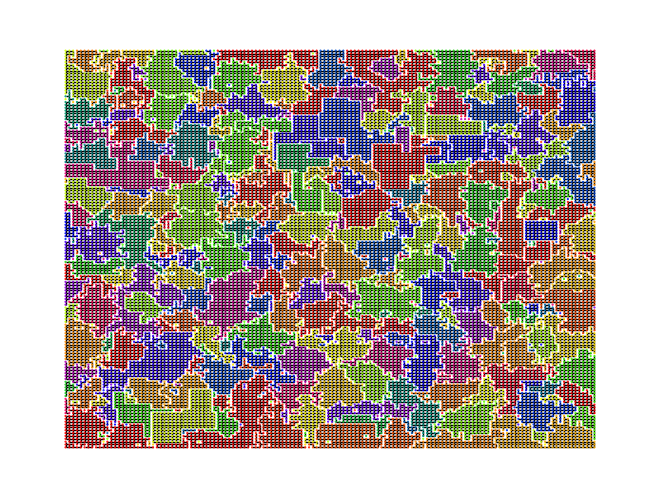

In [95]:
nx.draw(g.to_undirected(), pos={k:k for k in g.nodes}, node_size=0.3, node_color=colors, cmap="prism")
# nx.draw(g.to_undirected(), pos={k:k for k in g.nodes}, node_size=500, node_color=colors, cmap="prism")

### part 2

In [96]:
def need(node):
    in_dirs = set(g.edges[edge]["dir"] for edge in g.in_edges(node))
    out_dirs = set(g.edges[edge]["dir"] for edge in g.out_edges(node))
    res = set()
        
    if "r" not in in_dirs:
        res.add("l")
    if "r" not in out_dirs:
        res.add("r")
    if "d" not in in_dirs:
        res.add("u")
    if "d" not in out_dirs:
        res.add("d")

    return res

In [97]:
def node_cost(node, sub_graph):
    needs = need(node)

    left_parent = (node[0]-1, node[1])
    if left_parent in sub_graph:
        l_needs = need(left_parent) & {"u","d"}
        needs -= l_needs

    up_parent = (node[0], node[1]-1)
    if up_parent in sub_graph:
        u_needs = need(up_parent) & {"l","r"}
        needs -= u_needs
        
    return len(needs)

In [98]:
res =0
for plot in nx.weakly_connected_components(g):
    area = len(plot)
    perimeter = sum(node_cost(node, plot) for node in plot)
    res += area * perimeter
res

897702